# Machine learning basics: Exercises

## Exercise 1 MNIST data set
The MNIST database is a well-known collection of handwritten digit images used for training and testing machine learning algorithms, particularly in the field of image recognition. MNIST stands for Modified National Institute of Standards and Technology database. The database contains 60,000 training examples and 10,000 testing examples. Each example is a grayscale image of a handwritten digit (0 to 9) with a resolution of 28x28 pixels. The images are normalized and centered, making them consistent for analysis



#### Goal: train a classification machine learning model to predict the number of a given image
The training set is composed of 1797 matrices of the shape 8x8. We can visualise the content of the matrix with the matplotlib function .imshow(). 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


In [55]:
digits = datasets.load_digits()
X = digits.data  # shape: (1797, 64), each image is 8x8 pixels flattened
y = digits.target
class_names = digits.target_names


In [57]:
X.shape

(1797, 64)

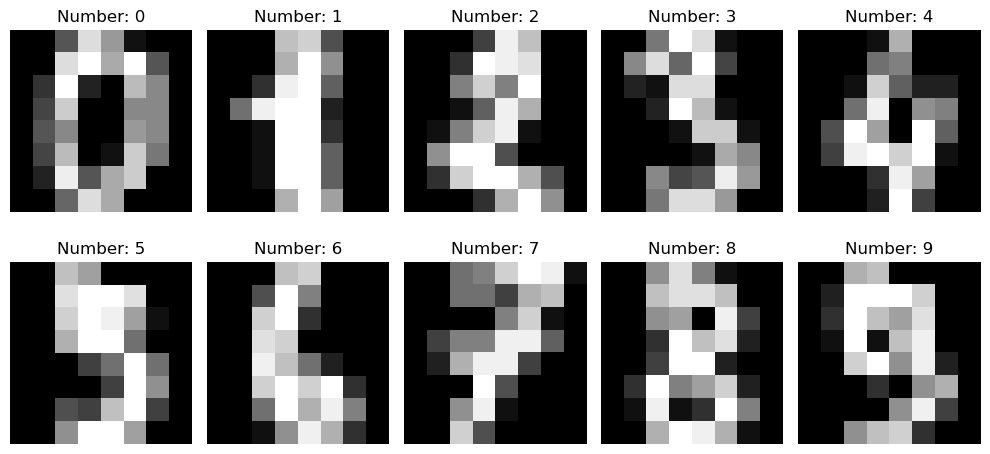

In [59]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Number: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [64]:
### Your code here

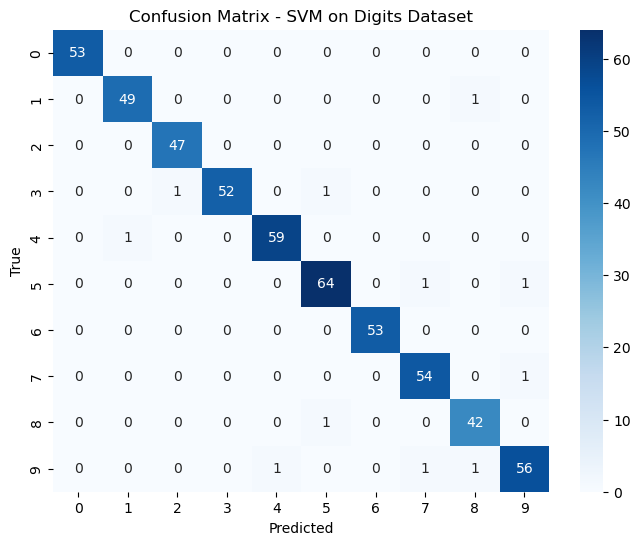

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



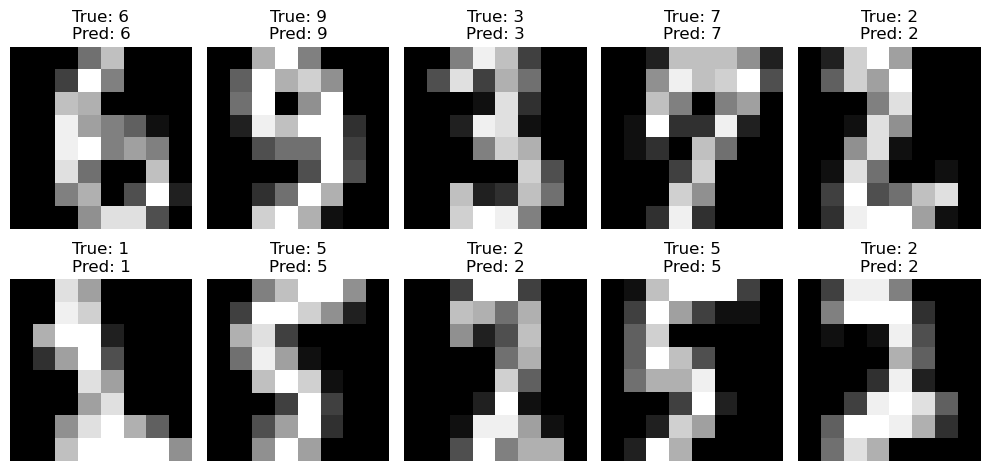

In [6]:
## Load the digits dataset
digits = datasets.load_digits()
X = digits.data  # shape: (1797, 64), each image is 8x8 pixels flattened
y = digits.target
class_names = digits.target_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM on Digits Dataset")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## Exercise 2: Classification of astronomical objects using Sloan Digital Sky Survey (SDSS) Data release 14
The SDSS (https://www.sdss.org/) is imaging and spectroscopic astronomical survey that utilizes a 2.5-meter optical telescope at Apache Point Observatory in New Mexico, United States.

The data release 14 (DR14) of the SDSS consists of 10,000 observations of various astronomical objects, each described by 17 feature columns and 1 class column which identifies the observation as either a star, galaxy, or quasar. 

#### Goal: build a classification algorithm that predicts if a certain objects is either a star, galaxy or a quasar
Remember to visualize your data!

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (assumes CSV format, e.g., sdss.csv)
##df = pd.read_csv("sdss.csv")  # Replace with your path

# View column names (usually includes: 'u', 'g', 'r', 'i', 'z', 'class')
##print(df.head())

## df.keys()

In [ ]:
## encoder..
le = LabelEncoder()

In [22]:
## split data set
X_train, X_test, y_train, y_test = train_test_split()

In [ ]:
# Encode target labels (e.g., 'STAR', 'GALAXY', 'QSO')
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # Maps to integers

# Features and labels
X = df[['u', 'g', 'r', 'i', 'z']]  # brightness in 5 bands
y = df['class']
class_names = le.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Classification: Stars, Galaxies, Quasars")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))
